# Autoregressive (AR) Models

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Describe AR Model

### Simulate AR(1) Time Series

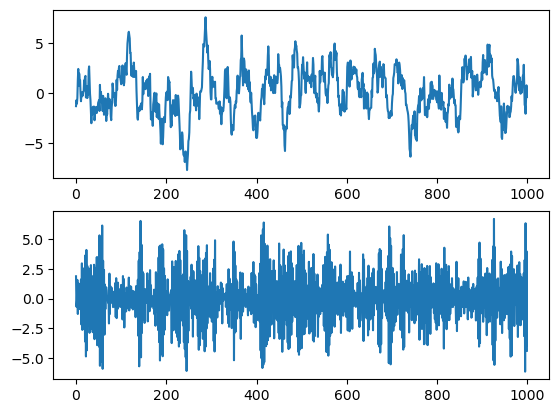

In [2]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: AR parameter = +0.9
plt.subplot(2,1,1)
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: AR parameter = -0.9
plt.subplot(2,1,2)
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plt.show()

### Compare the ACF for Several AR Time Series

In [3]:
simulated_data_3 = ArmaProcess([1, -0.3], [1]).generate_sample(nsample=1000)

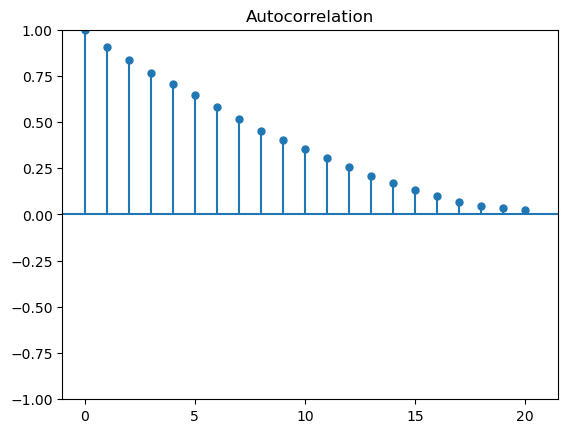

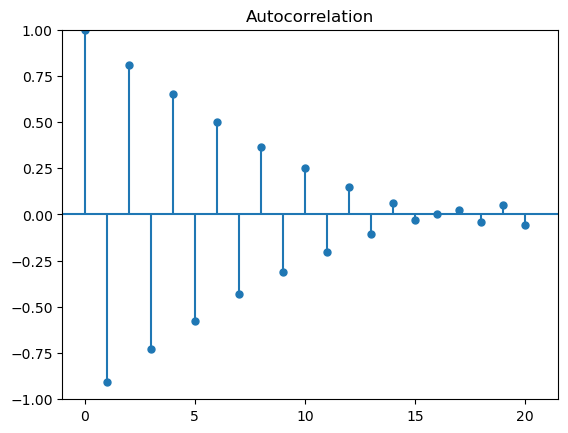

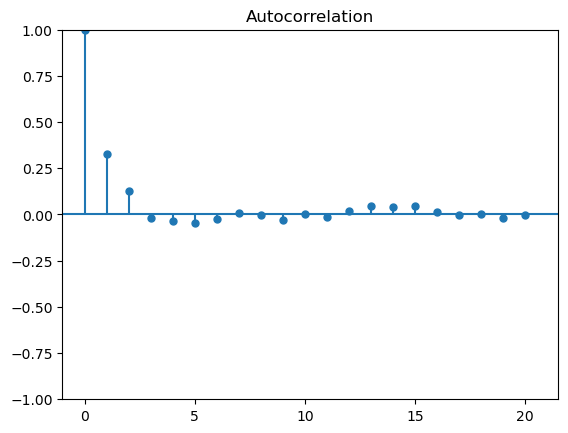

In [4]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot 1: AR parameter = +0.9
plot_acf(simulated_data_1, alpha=1, lags=20)
plt.show()

# Plot 2: AR parameter = -0.9
plot_acf(simulated_data_2, alpha=1, lags=20)
plt.show()

# Plot 3: AR parameter = +0.3
plot_acf(simulated_data_3, alpha=1, lags=20)
plt.show()

## Estimating and Forecasting AR Model

### Estimating an AR Model

In [7]:
simulated_data_1 = pd.DataFrame(simulated_data_1, columns=['data'])

In [8]:
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima.model import ARIMA

# Fit an AR(1) model to the first simulated data
mod = ARIMA(simulated_data_1, order=(1,0,0))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for phi
print("When the true phi=0.9, the estimate of phi is:")
print(res.params[1])

                               SARIMAX Results                                
Dep. Variable:                   data   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1382.363
Date:                Mon, 11 Aug 2025   AIC                           2770.726
Time:                        14:48:12   BIC                           2785.449
Sample:                             0   HQIC                          2776.321
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0722      0.329      0.219      0.826      -0.573       0.717
ar.L1          0.9077      0.014     67.005      0.000       0.881       0.934
sigma2         0.9278      0.040     23.044      0.0

/tmp/ipykernel_67333/4177240559.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(res.params[1])


### Forecasting with an AR Model

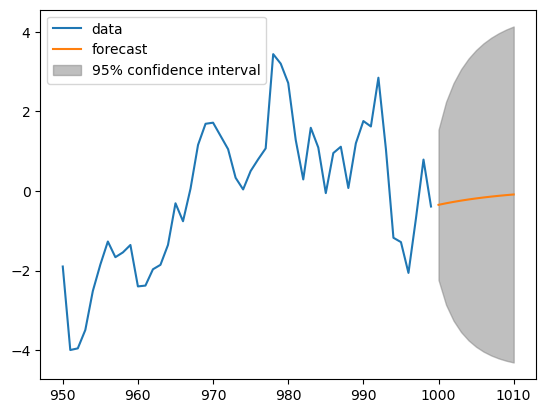

In [10]:
# Import the ARIMA and plot_predict from statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

# Forecast the first AR(1) model
mod = ARIMA(simulated_data_1, order=(1,0,0))
res = mod.fit()

# Plot the data and the forecast
fig, ax = plt.subplots()
simulated_data_1.loc[950:].plot(ax=ax)
plot_predict(res, start=1000, end=1010, ax=ax)
plt.show()

### Let's Forecast Interest Rates

In [18]:
interest_rate_data = pd.read_csv('US10Y.csv', index_col=0, parse_dates=True)

/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)


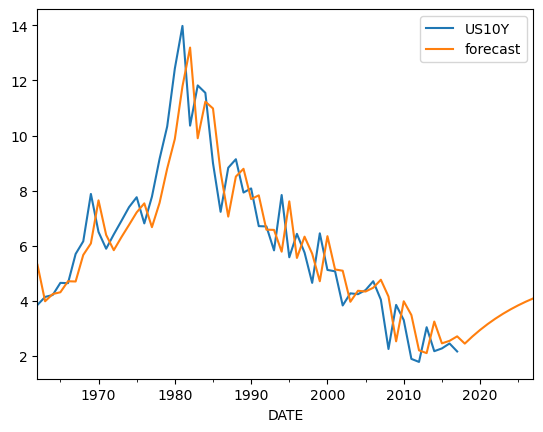

In [20]:
# Forecast interst rates using an AR(1) model
mod = ARIMA(interest_rate_data, order=(1,0,0))
res = mod.fit()

# Plot the data and the forecast
fig, ax = plt.subplots()
interest_rate_data.plot(ax=ax)
plot_predict(res, start=0, end='2027', alpha=None, ax=ax)
plt.show()

### Compare AR Model with Random Walk

In [30]:
simulated_data = np.array([
    5., 4.77522278, 5.60354317, 5.96406402, 5.97965372,
    6.02771876, 5.5470751, 5.19867084, 5.01867859, 5.50452928,
    5.89293842, 4.6220103, 5.06137835, 5.33377592, 5.09333293,
    5.37389022, 4.9657092, 5.57339283, 5.48431854, 4.68588587,
    5.25218625, 4.34800798, 4.34544412, 4.72362568, 4.12582912,
    3.54622069, 3.43999885, 3.77116252, 3.81727011, 4.35256176,
    4.13664247, 3.8745768, 4.01630403, 3.71276593, 3.55672457,
    3.07062647, 3.45264414, 3.28123729, 3.39193866, 3.02947806,
    3.88707349, 4.28776889, 3.47360734, 3.33260631, 3.09729579,
    2.94652178, 3.50079273, 3.61020341, 4.23021143, 3.94289347,
    3.58422345, 3.18253962, 3.26132564, 3.19777388, 3.43527681,
    3.37204482])

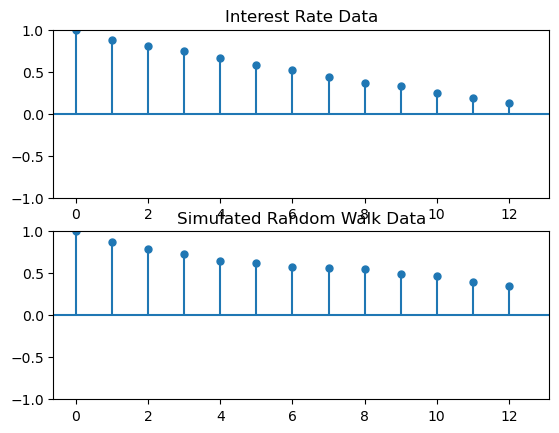

In [31]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot the interest rate series and the simulated random walk series side-by-side
fig, axes = plt.subplots(2,1)

# Plot the autocorrelation of the interest rate series in the top plot
fig = plot_acf(interest_rate_data, alpha=1, lags=12, ax=axes[0])

# Plot the autocorrelation of the simulated random walk series in the bottom plot
fig = plot_acf(simulated_data, alpha=1, lags=12, ax=axes[1])

# Label axes
axes[0].set_title("Interest Rate Data")
axes[1].set_title("Simulated Random Walk Data")
plt.show()

## Choosing the Right Model

### Estimate Order of Model: PACF

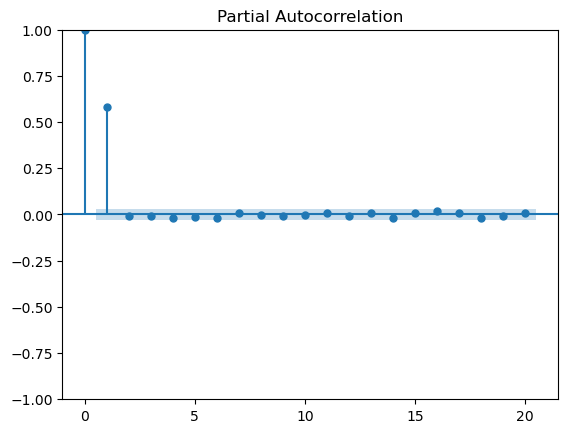

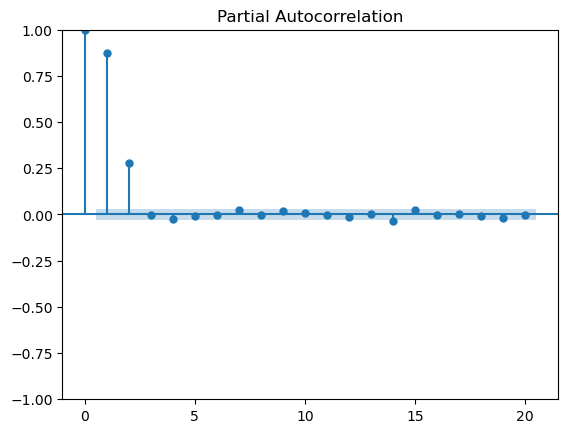

In [32]:
# Import the modules for simulating data and for plotting the PACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf

# Simulate AR(1) with phi=+0.6
ma = np.array([1])
ar = np.array([1, -0.6])
AR_object = ArmaProcess(ar, ma)
simulated_data_1 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(1)
plot_pacf(simulated_data_1, lags=20)
plt.show()

# Simulate AR(2) with phi1=+0.6, phi2=+0.3
ma = np.array([1])
ar = np.array([1, -0.6, -0.3])
AR_object = ArmaProcess(ar, ma)
simulated_data_2 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(2)
plot_pacf(simulated_data_2, lags=20)
plt.show()

### Estimate Order of Model: Information Criteria

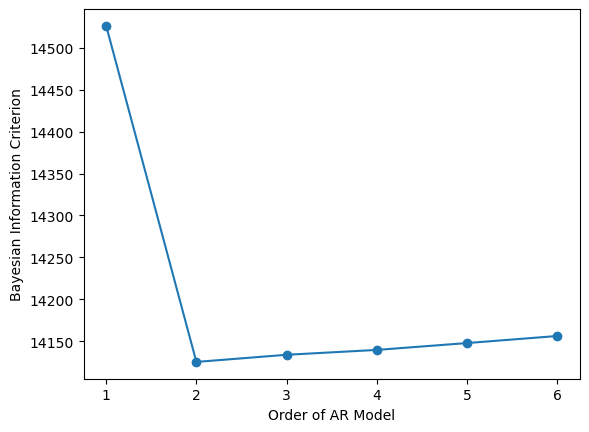

In [33]:
# Import the module for estimating an ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARIMA(simulated_data_2, order=(p,0,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic

# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()